# Fourier Series

Any periodic function $f(x)$ with a period of $2\pi$, i.e., $f(x) = f(x+2\pi)$ can be approximated with a Fourier series -

$$
\begin{align}
f(x) &= a_0 + a_1 \cos x + a_2 \cos 2x + ... + b_1 \sin x + b_2 \sin 2x + ... \\
&= a_0 + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx
\end{align}
$$

Fourier Series can also be expressed in terms of complex numbers -

$$
f(x) = \sum_{n=-\infty}^{\infty} c_n e^{inx}
$$

To find the co-efficients we will use the following results, which can be easily proven:

$$
\int_{-\pi}^{\pi} \sin mx \sin nx dx = \begin{cases}
\pi,  & \text{if $m = n$} \\
0, & \text{if $m \neq n$}
\end{cases} \tag{1}\label{1}
$$

$$
\int_{-\pi}^{\pi} \cos mx \cos nx dx = \begin{cases}
\pi,  & \text{if $m = n$} \\
0, & \text{if $m \neq n$}
\end{cases} \tag{2}\label{2}
$$

$$
\int_{-\pi}^{\pi} \sin mx \cos nx dx = 0 \tag{3}\label{3}
$$ 

$$
\int_{-\pi}^{\pi} \cos nx dx = 0 \tag{4}\label{4}
$$

$$
\int_{-\pi}^{\pi} \sin mx dx = 0 \tag{5}\label{5}
$$

## Find $a_0$

Integrating both sides we get -

$$
\begin{align}
\int_{-\pi}^\pi f(x) dx &= a_0 \int_{-\pi}^\pi dx + \sum_{n=1}^\infty a_n \int_{-\pi}^\pi \cos nx dx + \sum_{n=1}^\infty b_n \int_{-\pi}^\pi \sin nx dx \\
&= a_0 [x]_{-\pi}^\pi \quad \text{Because of (4) and (5) the last two terms are 0} \\
&= a_0 [\pi - (-\pi)] \\
&= a_0 2\pi \\
\end{align}
$$

$$
a_0 = \frac1{2\pi} \int_{-\pi}^\pi f(x) dx \tag{6}
$$

This can be interpreted as the average value of the function $f(x)$.

## Find a_k

Multiplying both sides by $\cos kx$ and integrating from $[-\pi, \pi]$ we get -

$$
\int_{-\pi}^\pi f(x) \cos kx \; dx = a_0 \int_{-\pi}^\pi \cos kx \; dx + \sum_{n=1}^\infty a_n \int_{-\pi}^\pi \cos nx \cos kx \; dx + \sum_{n=1}^\infty b_n \int_{-\pi}^\pi \sin nx \cos kx \; dx
$$

The first term is $0$ because of (4). The second term is $0$ for all $n \neq k$ and $\pi$ for $n=k$ by (2). The third term is $0$ by (3).

$$
\int_{-\pi}^\pi f(x) \cos kx \; dx = 0 + a_k \pi + 0
$$

This gives -

$$
a_k = \frac1\pi \int_{-\pi}^\pi f(x) \cos kx \; dx \tag{7}
$$

## Find $b_k$

Multiplying both sides by $\sin kx$ and integrating from $[-\pi, \pi]$ we get -

$$
\int_{-\pi}^\pi f(x) \sin kx \; dx = a_0 \int_{-\pi}^\pi \sin kx \; dx + \sum_{n=1}^\infty a_n \int_{-\pi}^\pi \cos nx \sin kx \; dx + \sum_{n=1}^\infty b_n \int_{-\pi}^\pi \sin nx \sin kx \; dx
$$

The first term is $0$ by (5). The second term is $0$ by (3). The third term is $0$ for $n \neq k$ and $\pi$ for $m = k$.

$$
\int_{-\pi}^\pi f(x) \sin kx \; dx = 0 + 0 + b_k \pi
$$

This gives -

$$
b_k = \frac1\pi \int_{-\pi}^\pi f(x) \sin kx \; dx \tag{8}
$$


In [1]:
import numpy as np
import plotter as pltr

In [2]:
pltr.set_backend(pltr.MatplotlibBackend)

In [3]:
def build_chart(chart, xinterval, ticks, tick_labels, *funcs):
    chart.origin = (0, 0)
    chart.grid = True
    chart.x_axis = pltr.Axis(ticks=ticks, tick_labels=tick_labels)
    chart.legend_location = pltr.LegendLocation.UPPER_RIGHT
    for func in funcs:
        color = pltr.Color.random()
        color.alpha = 1.
        graph = pltr.Graph(xinterval, func, legend=func.__name__, color=color)
        chart.add(graph)
        

def build_periodic_chart(chart, *funcs):
    ticks = [-np.pi, -0.75*np.pi, -0.5*np.pi, -0.25*np.pi, 0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi]
    tick_labels = ['-π', '-3π/4', '-π/2', '-π/4', '0', 'π/4', 'π/2', '3π/4', 'π']
    xinterval = (-np.pi, np.pi)
    build_chart(chart, xinterval, ticks, tick_labels, *funcs)

## Periodic Functions
A function $f(x)$ is said to have a period $T$ if $f(x + T) = f(x)$. Fourier Series work with functions that have a period of $2\pi$, so $f(x + 2\pi) = f(x)$. Two of the most basic periodic functions are $sin(x)$ and $cos(x)$. It is easily seen that they have a period of $2\pi$. 

In [4]:
x = np.random.randint(0, 1000) + np.random.random()
print(x, np.sin(x), np.sin(x+2*np.pi))
print(x, np.cos(x) , np.cos(x+2*np.pi))

564.8701071339228 -0.5782405629172438 -0.5782405629172613
564.8701071339228 0.8158663195629227 0.8158663195629102


Lets look at their shapes in the interval $[-\pi, \pi]$

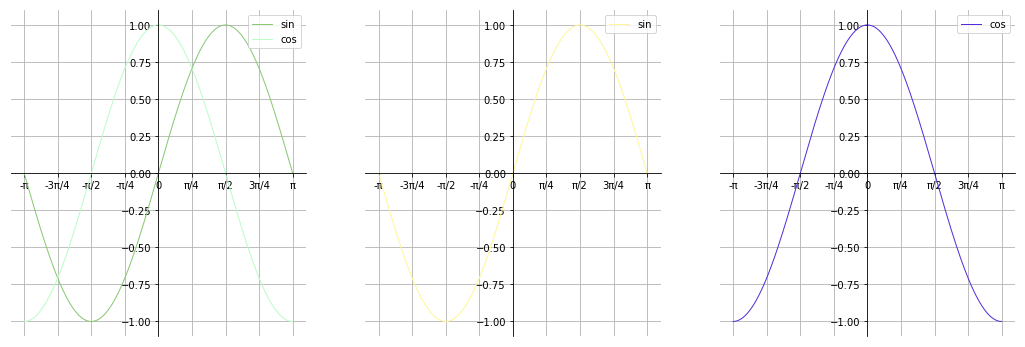

In [5]:
frame = pltr.Frame(height_px=600, width_px=1800)
frame.layout(nrows=1, ncols=3)
both = frame.create_chart()
build_periodic_chart(both, np.sin, np.cos)
sin = frame.create_chart()
build_periodic_chart(sin, np.sin)
cos = frame.create_chart()
build_periodic_chart(cos, np.cos)
frame.show()

These functions are periodic, which means even if I saw them in the interval $[0, 2\pi]$, I'd still sess the periodicity.

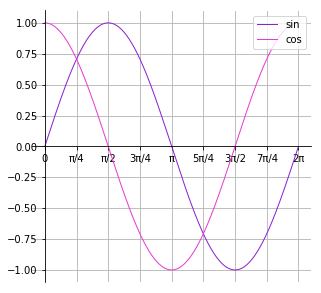

In [6]:
frame = pltr.Frame()
chart = frame.create_chart()
ticks = [0, 0.25*np.pi, 0.5*np.pi, 0.75*np.pi, np.pi, 1.25*np.pi, 1.5*np.pi, 1.75*np.pi, 2*np.pi]
tick_labels = ['0', 'π/4', 'π/2', '3π/4', 'π', '5π/4', '3π/2', '7π/4', '2π']
build_chart(chart, (0, 2*np.pi), ticks, tick_labels, np.sin, np.cos)
frame.show()

## Delta Function
The delta function can be considered a periodic function with any period. Lets assume period $2\pi$.

In [7]:
# This should really return float('inf') for x == 0 but returning 10 instead so it is easy to draw
def delta(x):
    return 10 if x == 0 else 0

x = np.random.randint(0, 1000) + np.random.random()
print(x, delta(x), delta(x+2*np.pi))

600.339581536667 0 0


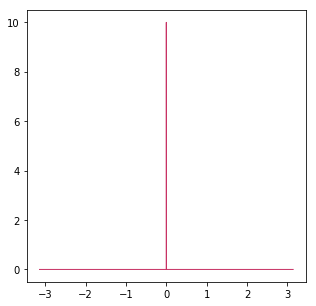

In [8]:
frame = pltr.Frame()
chart = frame.create_chart()
dgraph = pltr.Graph((-np.pi, np.pi), delta, color=pltr.Color(red=200, blue=100, green=50))
chart.add(dgraph)
frame.show()

## Fourier Co-efficients
The delta function is an even function, i.e., $\delta(x) = \delta(-x)$, so we expect that it will only have cosine components, which is also an even function, and it should have no sine components because sine is an odd function.

### To find $a_0$

$$
a_0 = \frac1{2\pi} \int_{-\pi}^\pi \delta(x) dx \quad \text{By equation (6)}
$$

Integral of the delta function in any interval is $1$ as long as it crosses the $0$ point, which it does in this case -

$$
a_0 = \frac1{2\pi}
$$

### To find $a_k$
$$
a_k = \frac1\pi \int_{-\pi}^\pi \delta(x) \cos kx \; dx \quad \text{By equation (7)}
$$

At $x=0$, $\cos kx = 1$, so this integral is really just the integral of the delta function which gives us -
$$
a_k = \frac1\pi
$$

### To find $b_k$
$$
b_k = \frac1\pi \int_{-\pi}^\pi \delta(x) \sin kx \; dx \quad \text{Because of equation (8)}
$$

At $x=0$, $\sin kx = 0$, so the integral is $0$ everywhere -
$$
b_k = 0
$$

The final form of the Fourier Series for the delta function is -

$$
\delta(x) = \frac1{2\pi} + \frac1\pi \left( \cos x + \cos 2x + ... \right)
$$

In [9]:
# Instead of defining a bunch of functions that return cos(x)/π, cos(2x)/π, ...
# this function generator generates a function that returns cos(nx)/π for any given n.
def gen_cosnx_by_pi(n):
    def cosnx_by_pi(x):
        return np.cos(n*x)/np.pi
    func = cosnx_by_pi
    func.__name__ = f'cos{n}x_by_pi'
    return func

cos2x_by_pi = gen_cosnx_by_pi(2)
print(cos2x_by_pi(np.pi))

cos3x_by_pi = gen_cosnx_by_pi(3)
print(cos3x_by_pi(np.pi))

0.3183098861837907
-0.3183098861837907


In [10]:
# This should just return 1/2π, but for some reason plotter raises an error when I do that
# so hacking it to return x/2πx and addressing x=0 case.
def const_fn(x):
    return x/(2*np.pi*x) if x != 0 else 1/(2*np.pi)

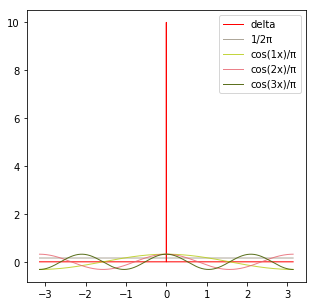

In [11]:
frame = pltr.Frame()
chart = frame.create_chart()
chart.legend_location = pltr.LegendLocation.UPPER_RIGHT

dg = pltr.Graph((-np.pi, np.pi), delta, color=pltr.Color(red=255, blue=0, green=0), legend='delta')
chart.add(dg)

g0 = pltr.Graph((-np.pi, np.pi), const_fn, color=pltr.Color.random(), legend='1/2π')
chart.add(g0)

for k in range(1, 4):
    g = pltr.Graph((-np.pi, np.pi), gen_cosnx_by_pi(k), color=pltr.Color.random(), legend=f'cos({k}x)/π')
    chart.add(g)

frame.show()

In [12]:
def gen_fourier_delta(terms):
    funcs = [gen_cosnx_by_pi(n) for n in range(terms)]
    def fourier_delta(x):
        return const_fn(x) + sum(func(x) for func in funcs)
    return fourier_delta

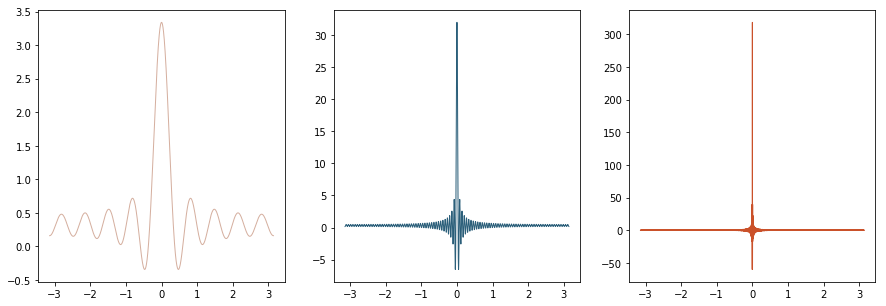

In [13]:
frame = pltr.Frame(height_px=500, width_px=1500)
frame.layout(nrows=1, ncols=3)

c1 = frame.create_chart()
clr = pltr.Color.random()
clr.alpha = 1.
g1 = pltr.Graph((-np.pi, np.pi), gen_fourier_delta(10), color=clr)
c1.add(g1)

c2 = frame.create_chart()
clr = pltr.Color.random()
clr.alpha = 1.
g2 = pltr.Graph((-np.pi, np.pi), gen_fourier_delta(100), color=clr)
c2.add(g2)

c3 = frame.create_chart()
clr = pltr.Color.random()
clr.alpha = 1.
g3 = pltr.Graph((-np.pi, np.pi), gen_fourier_delta(1000), color=clr)
c3.add(g3)

frame.show()

## Square Wave Function

The square wave function is a periodic function. Setting its period to $2\pi$ it can be written as -

$$
s(x) = (-1)^{\lfloor x/\pi \rfloor}
$$

In [14]:
def square_wave(x):
    return (-1)**np.floor(x/np.pi)

In [15]:
x = np.random.randint(0, 1000) + np.random.random()
print(x, square_wave(x), square_wave(x+2*np.pi))

120.70943071960029 1.0 1.0


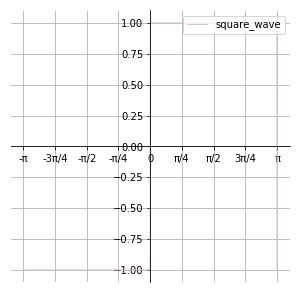

In [16]:
frame = pltr.Frame()
chart = frame.create_chart()
build_periodic_chart(chart, square_wave)
frame.show()

## Fourier Co-Efficients
Square function is an odd function, i.e., $s(x) = -s(-x)$, so we expect that this will have no cosine components, only sine components.

### To find $a_0$

$$
a_0 = \frac1{2\pi} \int_{-\pi}^\pi s(x) dx \quad \text{By equation (6)}
$$

This can be broken down into the sum of two integrals from $[-\pi, 0]$ and $[0, \pi]$ -

$$
a_0 = \frac1{2\pi} \left( \int_{-\pi}^0 s(x) dx + \int_0^\pi s(x) dx \right)
$$

In the first integral the function is simply $-1$ and in the second integral it is $1$ -

$$
\begin{align}
a_0 &= \frac1{2\pi} \left( \int_{-\pi}^0 -1 dx + \int_0^\pi 1 dx \right) \\
&= \frac1{2\pi} \left(-1 \int_{-\pi}^0 dx + \int_0^\pi dx \right) \\
&= \frac1{2\pi} \left( -1[x]_{-\pi}^0 + [x]_0^\pi \right) \\
&= \frac1{2\pi} \left( -1[0 - (-\pi)] + [\pi - 0] \right) \\
&= \frac1{2\pi} \left( -\pi + \pi \right) \\
&= 0
\end{align}
$$

### To find $a_k$
$$
a_k = \frac1\pi \int_{-\pi}^\pi s(x) \cos kx \; dx \quad \text{By equation (7)}
$$

Writing the integral as the sum of two integrals -

$$
\begin{align}
a_k &= \frac1\pi \left( \int_{-\pi}^0 s(x) \cos kx \; dx + \int_0^\pi s(x) \cos kx \; dx \right) \\
&= \frac1\pi \left( \int_{-\pi}^0 (-1) \cos kx \; dx + \int_0^\pi 1 \cos kx \; dx \right) \\
&= \frac1\pi \left(- \int_{-\pi}^0 \cos kx \; dx + \int_0^\pi \cos kx \; dx \right) \\
&= \frac1\pi \left(- \left[\frac1k \sin kx \right]_{-\pi}^0 + \left[\frac1k \sin kx \right]_0^\pi \right) \\
&= \frac1{\pi k} \left(- \left[\sin 0 - \sin (-k\pi) \right] + \left[\sin k\pi - \sin 0 \right] \right) \\
&= 0 \quad \text{Because $\sin kx = 0$ for all integers $k$}
\end{align}
$$


### To find $b_k$
$$
b_k = \frac1\pi \int_{-\pi}^\pi s(x) \sin kx \; dx \quad \text{Because of equation (8)}
$$

Writing the integral as the sum of two integrals we get -

$$
b_k = \frac1\pi \left( \int_{-\pi}^0 s(x) \sin kx \; dx + \int_0^\pi s(x) \sin kx \; dx\right)
$$

$$
\begin{align}
\int_{-\pi}^0 s(x) \sin kx \; dx &= -1 \int_{-\pi}^0 \sin kx \; dx \quad \text{Because the square wave is -1 in this interval} \\
&= - \left[ -\frac1k \cos kx \right]_{-\pi}^0 \\
&= \frac1k \left[\cos 0 - \cos (-k\pi) \right] \\
&= \frac1k \left[1 - \cos (k\pi) \right] \quad \text{Because $\cos 0 = 1$ and $\cos(-t) = \cos(t)$}  \\
\end{align}
$$

$$
\begin{align}
\int_0^\pi s(x) \sin kx \; dx &= \int_0^\pi \sin kx \; dx \quad \text{Because the square wave is 1 in this interval} \\
&= \left[ -\frac1k \cos kx \right]_0^\pi \\
&= -\frac1k \left[ \cos k\pi - \cos 0 \right] \\
&= -\frac1k \left[ \cos k\pi - 1 \right] \\
&= \frac1k \left[1 - \cos k\pi \right]
\end{align}
$$

Plugging the value of these two integrals back into $b_k$ we get -
$$
\begin{align}
b_k &= \frac1\pi \left( \frac1k \left[ 1 - \cos k\pi \right] + \frac1k \left[ 1 - \cos k\pi \right] \right) \\
&= \frac{2}{k\pi} \left( 1 - \cos k\pi \right)
\end{align}
$$

Now $\cos k\pi = 0$ for all even integers $k$ and $\cos k\pi = -1$ for all odd integers $k$. This means that $b_k = 0$ for all even $k$. And when $k$ is odd, we have -

$$
\begin{align}
b_k &= \frac{2}{k\pi} \left( 1 - \cos k\pi \right) \\
&= \frac{2}{k\pi} \left( 1 - (-1) \right) \\
&= \frac{4}{k\pi}
\end{align}
$$

The final form of the Fourier Series for this square wave is -

$$
s(x) = \frac4\pi \left( \frac{\sin x}{1} + \frac{\sin 3x}{3} + \frac{\sin 5x}{5} + ... \right)
$$

In [17]:
def gen_four_sinnx_by_npi(n):
    def four_sinnx_by_npi(x):
        return (4 * np.sin(n*x)) / (n * np.pi)
    func = four_sinnx_by_npi
    func.__name__ = f'four_sin{n}x_by_{n}pi'
    return func

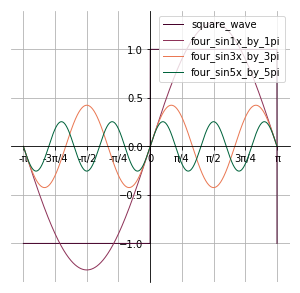

In [18]:
frame = pltr.Frame()
chart = frame.create_chart()
four_sinx_by_pi = gen_four_sinnx_by_npi(1)
four_sin3x_by_3pi = gen_four_sinnx_by_npi(3)
four_sin5x_by_5pi = gen_four_sinnx_by_npi(5)
build_periodic_chart(chart, square_wave, four_sinx_by_pi, four_sin3x_by_3pi, four_sin5x_by_5pi)
frame.show()

In [19]:
def gen_fourier_square(terms):
    funcs = [gen_four_sinnx_by_npi(n) for n in range(1, terms, 2)]
    def fourier_square(x):
        return sum(func(x) for func in funcs)
    return fourier_square

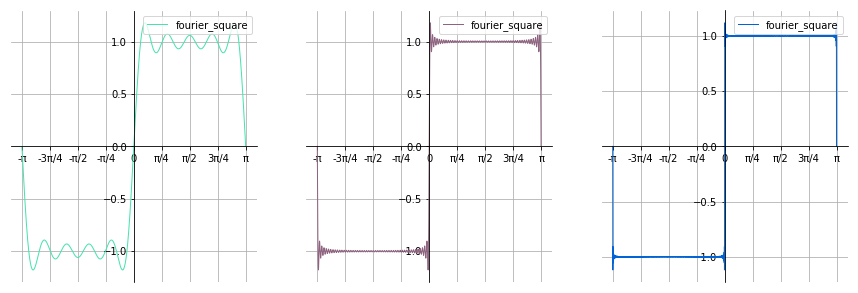

In [20]:
frame = pltr.Frame(height_px=500, width_px=1500)
frame.layout(nrows=1, ncols=3)

c1 = frame.create_chart()
build_periodic_chart(c1, gen_fourier_square(10))

c2 = frame.create_chart()
build_periodic_chart(c2, gen_fourier_square(100))

c3 = frame.create_chart()
build_periodic_chart(c3, gen_fourier_square(1000))

frame.show()